In [27]:
from fastai2.vision.all import *
import sys
sys.path.append('..')

In [40]:
%load_ext autoreload
%autoreload 2

from modules.trainutils import build_dl, piece_class_parse
from modules.trainutils import my_metrics, stratify_sample
from modules.trainutils import show_cf

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
test_path = Path('../../../other-chess-data/regulation-pieces-1/crops/')
train_path = Path('../../../rf-chess-data/cropped_v1/')

In [30]:
test_dl = build_dl(test_path, n=None)

In [31]:
len(test_dl.train.items)

60

In [19]:
n = 200
seed=42

train_dl = ImageDataLoaders.from_name_func(
                train_path, 
                # get_image_files(train_path),
                stratify_sample(train_path, n=n, np_seed=seed),
                valid_pct=0.2, 
                seed=42,
                label_func=piece_class_parse, 
                item_tfms=RandomResizedCrop(128, min_scale=0.5),
                batch_tfms=aug_transforms(),
)

In [21]:
learn = cnn_learner(train_dl, resnet18, metrics=error_rate)

In [23]:
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,error_rate,time
0,2.833010,3.259990,0.842105,00:08
1,2.417905,2.347074,0.657895,00:09
2,2.153185,1.779068,0.526316,00:08
3,1.939914,1.335243,0.447368,00:08
4,1.746889,1.048802,0.289474,00:08
5,1.630784,0.901110,0.263158,00:08


In [33]:
test_dl = learn.dls.test_dl(get_image_files(test_path), 
                            with_labels=True)

In [39]:
my_metrics(learn, test_dl)

(2.1970750470956166, 0.35)

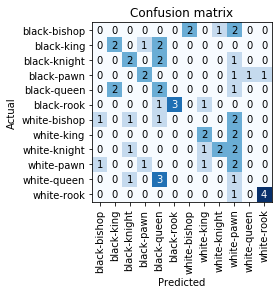

In [50]:
interp = show_cf(learn, test_dl)